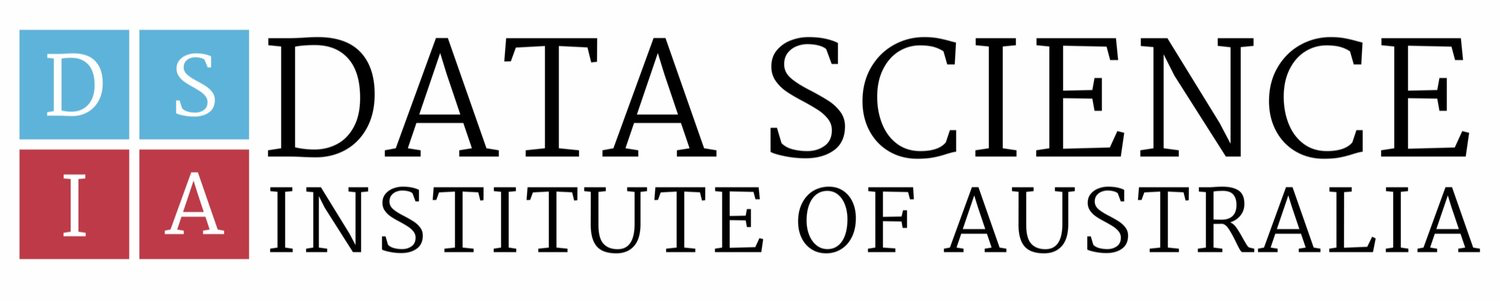

# Data Science and AI
## Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

In [2]:
## Create data points (circles)

# Load the Wine dataset from sklearn
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [3]:
## Convert data into a DataFrame

# Declare the columns names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [4]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean    -0.002330   -0.004802
std      0.519715    0.525529
min     -1.085254   -1.068835
25%     -0.301071   -0.296474
50%      0.010098   -0.012857
75%      0.296842    0.279299
max      1.060413    1.031834

Sample of X__________________________________________________
          A         B
0  0.307259 -0.027239
1 -0.394406 -1.068835
2  0.086215 -0.190593
3  0.703772 -0.744126
4 -0.956496 -0.241940


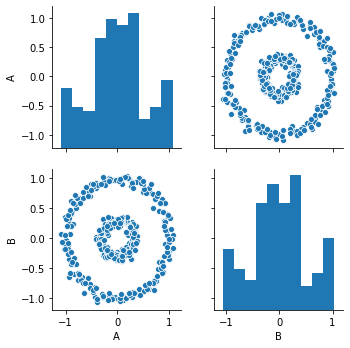

In [5]:
sbn.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

In [6]:
def print_centroids(centroids):
    global step
    if show_steps:
        print('(Step) Step %d' % step)
        for c in centroids:
            print(', '.join(['%.3f' % f for f in c]))
        step += 1

In [7]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    print_centroids(centroids)

    return centroids

In [8]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt( np.square(p - q).sum() )
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [9]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])

    print_centroids(c)

    return c

In [10]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')
        
    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    for i in range(len(centroids)):
        for s in range(step + 1):
            e = [z[i][0] for z in centroids_list]
            f = [z[i][1] for z in centroids_list]
            ax.plot(e, f, c = 'k', marker = '+', linewidth = 1)

        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')

    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

In [11]:
## Flag intermediate output

step = 0
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

(Step) Step 0
-0.837, -0.999
-0.338, -0.517
-0.684, 0.214
-0.862, -0.520
0.040, -0.403
(Step) Step 1
-0.497, -0.925
-0.285, -0.549
-0.327, 0.462
-0.867, -0.424
0.348, -0.116
(Step) Step 2
-0.316, -0.917
-0.098, -0.372
-0.231, 0.468
-0.911, -0.282
0.486, -0.056
(Step) Step 3
-0.159, -0.926
-0.097, -0.239
-0.176, 0.493
-0.917, -0.185
0.570, -0.022
(Step) Step 4
-0.055, -0.919
-0.104, -0.185
-0.116, 0.528
-0.909, -0.139
0.611, -0.007
(Step) Step 5
-0.012, -0.911
-0.105, -0.150
-0.076, 0.565
-0.905, -0.092
0.626, 0.013
(Step) Step 6
0.016, -0.905
-0.102, -0.120
-0.061, 0.603
-0.903, -0.077
0.632, 0.032
(Step) Step 7
0.044, -0.897
-0.098, -0.101
-0.054, 0.632
-0.903, -0.077
0.638, 0.054
(Step) Step 8
0.057, -0.900
-0.086, -0.076
-0.060, 0.675
-0.898, -0.091
0.647, 0.055
(Step) Step 9
0.070, -0.905
-0.059, -0.034
-0.085, 0.783
-0.891, -0.103
0.681, 0.057
(Step) Step 10
0.084, -0.908
-0.033, -0.006
-0.101, 0.880
-0.886, -0.116
0.753, 0.056
(Step) Step 11
0.084, -0.908
-0.013, -0.004
-0.101, 0

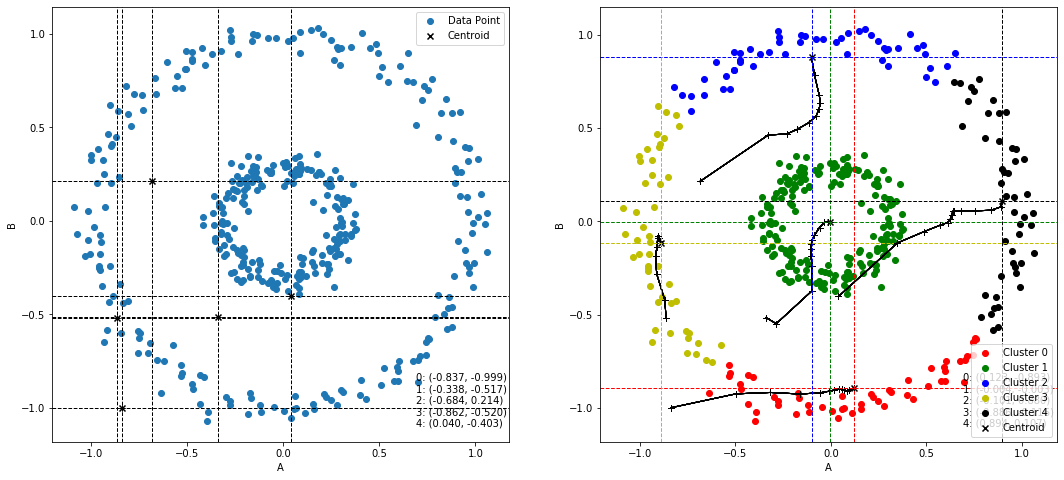

In [12]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 5

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]


# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

### Question: What happens if the algorithm is run multiple times?
        Change in results eventhough the clustering remains 5 groups, the grouping of the cluster changes and the centres also moved.

### Question: What happens if `K` is changed?
Let us test by changing K from 5 to 3

If K = 3, the cluster size is much more larger/bigger

In [13]:
# 1. Define the number of clusters `K`
K = 3


(Step) Step 15
0.718, 0.066
-0.281, -0.460
-0.803, 0.459
(Step) Step 16
0.487, 0.126
-0.199, -0.377
-0.504, 0.484
(Step) Step 17
0.479, 0.139
-0.193, -0.461
-0.427, 0.451
(Step) Step 18
0.484, 0.127
-0.191, -0.500
-0.397, 0.422
(Step) Step 19
0.497, 0.123
-0.175, -0.520
-0.391, 0.393
(Step) Step 20
0.498, 0.128
-0.166, -0.532
-0.385, 0.381
(Step) Step 21
0.497, 0.135
-0.157, -0.541
-0.384, 0.374
(Step) Step 22
0.497, 0.135
-0.138, -0.548
-0.397, 0.360
(Step) Step 23
0.494, 0.147
-0.123, -0.555
-0.405, 0.348
(Step) Step 24
0.496, 0.159
-0.109, -0.555
-0.404, 0.345
(Step) Step 25
0.498, 0.170
-0.105, -0.550
-0.409, 0.340
(Step) Step 26
0.500, 0.177
-0.100, -0.544
-0.412, 0.340
(Step) Step 27
0.498, 0.183
-0.094, -0.545
-0.412, 0.340
(Step) Step 28
0.494, 0.192
-0.085, -0.544
-0.424, 0.330
(Step) Step 29
0.490, 0.205
-0.073, -0.545
-0.424, 0.330
(Step) Step 30
0.488, 0.211
-0.065, -0.550
-0.431, 0.317
(Step) Step 31
0.488, 0.211
-0.063, -0.553
-0.430, 0.313
(Step) Step 32
0.488, 0.211
-0.

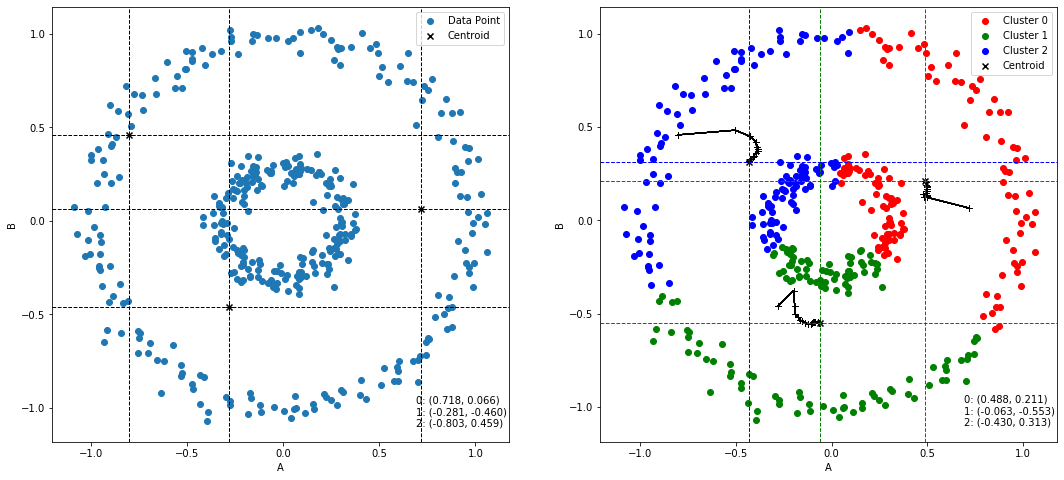

In [14]:

features = ['A', 'B']

centroids = create_centroids(K, features)
centroids_list = [centroids]



fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)


while True:
   
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

   
    old_c = centroids.copy()

   
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)


    if old_c == centroids:
        break

plot_data(axes[1], X[features], y, centroids)
plt.show()